In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pca import pca
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=False)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Splitting the dataset

In [3]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [4]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
452,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.040550,0.019450,0.1615,...,13.09,37.88,85.07,523.7,0.1208,0.18560,0.18110,0.07116,0.2447,0.08194
374,9013005,13.69,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.020310,0.1872,...,14.84,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701
169,8712853,14.97,16.95,96.22,685.9,0.09855,0.07885,0.026020,0.037810,0.1780,...,16.11,23.00,104.60,793.7,0.1216,0.16370,0.06648,0.08485,0.2404,0.06428
334,897374,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,...,13.35,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207
179,873586,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,0.1466,...,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,897604,12.99,14.23,84.08,514.3,0.09462,0.09965,0.037380,0.020980,0.1652,...,13.72,16.91,87.38,576.0,0.1142,0.19750,0.14500,0.05850,0.2432,0.10090
96,86211,12.18,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115
259,88725602,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,...,18.49,49.54,126.30,1035.0,0.1883,0.55640,0.57030,0.20140,0.3512,0.12040


In [8]:
X_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
206,879804,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.01952,0.1934,...,10.42,23.22,67.08,331.6,0.1415,0.1247,0.06213,0.05588,0.2989,0.07380
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750
324,89511501,12.200,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,...,13.75,21.38,91.11,583.1,0.1256,0.1928,0.11670,0.05556,0.2661,0.07961
483,912558,13.700,17.64,87.76,571.1,0.09950,0.07957,0.04548,0.03160,0.1732,...,14.96,23.53,95.78,686.5,0.1199,0.1346,0.17420,0.09077,0.2518,0.06960
552,924084,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,...,13.87,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,905501,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.02653,0.1966,...,14.10,28.88,89.00,610.2,0.1240,0.1795,0.13770,0.09532,0.3455,0.06896
383,90251,12.390,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,0.1779,...,14.18,23.13,95.23,600.5,0.1427,0.3593,0.32060,0.09804,0.2819,0.11180
421,906564,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,...,16.46,18.34,114.10,809.2,0.1312,0.3635,0.32190,0.11080,0.2827,0.09208
303,892657,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842


In [9]:
y_train

452    0
374    0
169    0
334    0
179    0
      ..
336    0
96     0
564    1
259    1
454    0
Name: diagnosis, Length: 455, dtype: int64

Scaling  data

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train

array([[-0.16861922, -0.59942219,  2.116575  , ..., -0.67774052,
        -0.73774465, -0.11455417],
       [-0.16940042, -0.12706014, -0.76418005, ..., -0.69727927,
         0.68095125, -0.40178152],
       [-0.17177279,  0.2307052 , -0.55570436, ..., -0.47038741,
        -0.80738383, -1.14344563],
       ...,
       [-0.23331571,  2.0726377 ,  0.73305448, ...,  1.60087172,
        -1.36449729, -0.7431917 ],
       [ 0.46063755,  0.38722754,  3.37927438, ...,  1.29491607,
         0.98703975,  2.12616866],
       [-0.23343602, -0.4261296 , -0.50832352, ..., -0.26348869,
         0.59511691, -0.61793029]])

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 31), (455,), (114, 31), (114,))

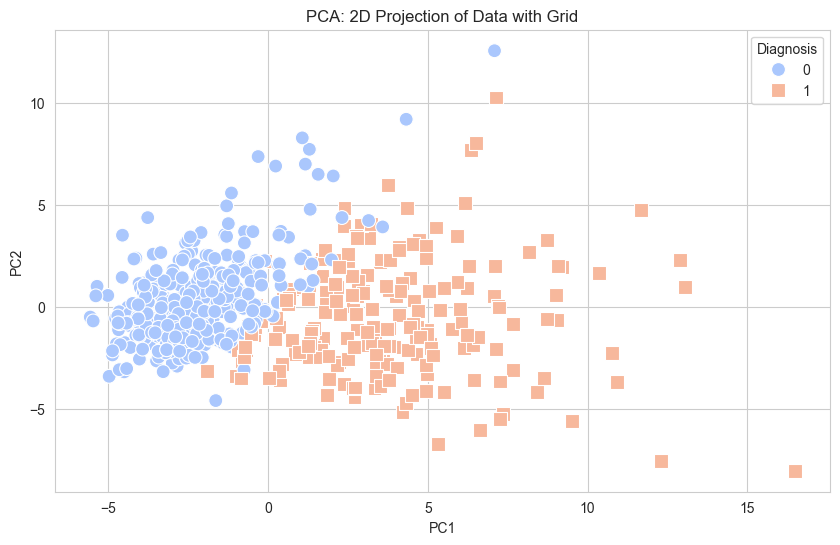

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components and the target variable
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y

# Visualize the data in 2D using PCA components with grid
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='coolwarm', style='Diagnosis', markers=['o', 's'], s=100)
plt.title('PCA: 2D Projection of Data with Grid')
plt.grid(True)
plt.show()

Model

In [14]:
import pandas as pd

# Create an empty DataFrame
model_comparison = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'F1 Score', 'Recall', 'Precision'])
model_comparison

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision


Logistic Regression

In [15]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred=LR.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        79
           1       0.97      0.94      0.96        35

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Training Accuracy: 0.9912087912087912
Testing Accuracy: 0.9736842105263158
F1 Score: 0.9565217391304348
Recall: 0.9428571428571428
Precision: 0.9705882352941176


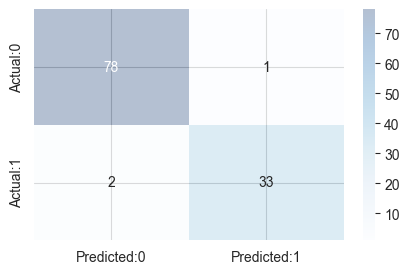

In [17]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = LR.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[0]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= plt.cm.Blues, alpha=0.3)
plt.show()

Support Vector Machine

In [18]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [19]:
y_pred=svm.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.97      0.97      0.97        35

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.9824561403508771
F1 Score: 0.9714285714285714
Recall: 0.9714285714285714
Precision: 0.9714285714285714


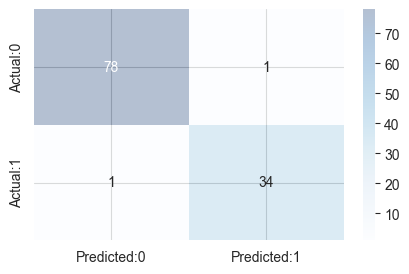

In [20]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = svm.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)


model_comparison.loc[1]=['Support Vector Machine', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue colormap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.97      0.99        35

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Training Accuracy: 0.9692307692307692
Testing Accuracy: 0.9912280701754386
F1 Score: 0.9855072463768115
Recall: 0.9714285714285714
Precision: 1.0


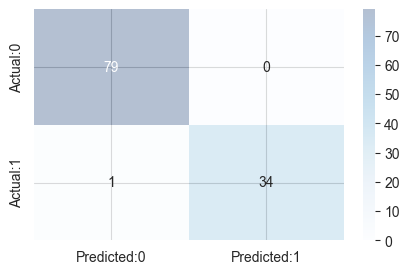

In [23]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = knn.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[2]=['KNN', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue colormap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Naives Bayes

In [24]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred=NB.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.84      0.89      0.86        35

    accuracy                           0.91       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

Training Accuracy: 0.9428571428571428
Testing Accuracy: 0.9122807017543859
F1 Score: 0.8611111111111112
Recall: 0.8857142857142857
Precision: 0.8378378378378378


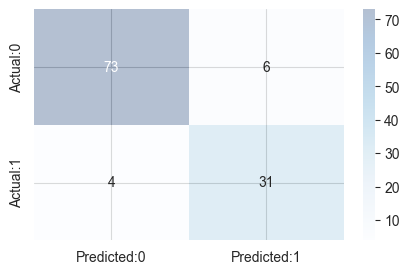

In [26]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Naive Bayes (NB) model
train_acc = NB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Naive Bayes (NB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[3]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=8)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=8)

In [28]:
y_pred=DT.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        79
           1       0.84      0.91      0.88        35

    accuracy                           0.92       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114

Training Accuracy: 1.0
Testing Accuracy: 0.9210526315789473
F1 Score: 0.8767123287671234
Recall: 0.9142857142857143
Precision: 0.8421052631578947


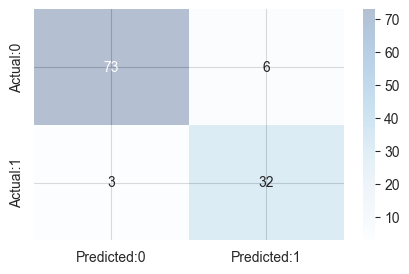

In [29]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Decision Tree (DT) model
train_acc = DT.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Decision Tree (DT) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[4]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue color
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap with blue color
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RF=RandomForestClassifier(n_estimators=50,random_state=1)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [31]:
y_pred=RF.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        79
           1       0.86      0.89      0.87        35

    accuracy                           0.92       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Training Accuracy: 1.0
Testing Accuracy: 0.9210526315789473
F1 Score: 0.8732394366197184
Recall: 0.8857142857142857
Precision: 0.8611111111111112


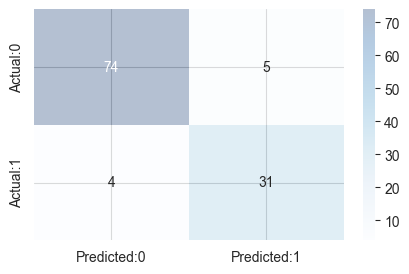

In [32]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Random Forest (RF) model
train_acc = RF.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Random Forest (RF) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[5]=['Random forest', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap without specifying color (default color)
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap without specifying color (default color)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Gradient Boosting

In [33]:
GB=GradientBoostingClassifier(n_estimators=12)
GB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=12)

In [34]:
y_pred=GB.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.87      0.94      0.90        35

    accuracy                           0.94       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Training Accuracy: 0.989010989010989
Testing Accuracy: 0.9385964912280702
F1 Score: 0.904109589041096
Recall: 0.9428571428571428
Precision: 0.868421052631579


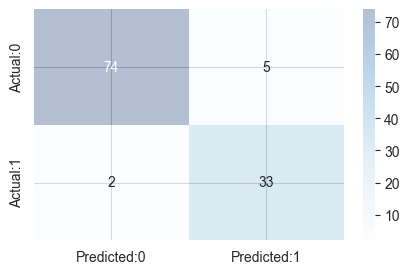

In [35]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Gradient Boosting (GB) model
train_acc = GB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Gradient Boosting (GB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[6]=['Gradient Boosting', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with specified color (blue)
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap with specified color (blue)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()


XGBoost

In [36]:
from xgboost.sklearn import XGBClassifier
XGB= XGBClassifier(random_state=0,n_estimators=88,booster='gbtree')
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=88, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [37]:
y_pred=XGB.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.97      0.97      0.97        35

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Training Accuracy: 1.0
Testing Accuracy: 0.9824561403508771
F1 Score: 0.9714285714285714
Recall: 0.9714285714285714
Precision: 0.9714285714285714


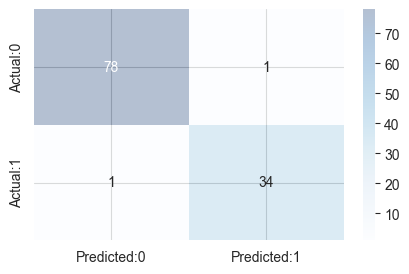

In [38]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for XGBoost (XGB) model
train_acc = XGB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for XGBoost (XGB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[8]=['XGBoost', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap without specifying color
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap without specifying color
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Model Selection

In [39]:
model_comparison

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.991209,0.973684,0.956522,0.942857,0.970588
1,Support Vector Machine,0.984615,0.982456,0.971429,0.971429,0.971429
2,KNN,0.969231,0.991228,0.985507,0.971429,1.000000
3,Gaussian Naives Bayes,0.942857,0.912281,0.861111,0.885714,0.837838
4,Decision Tree,1.000000,0.921053,0.876712,0.914286,0.842105
5,Random forest,1.000000,0.921053,0.873239,0.885714,0.861111
6,Gradient Boosting,0.989011,0.938596,0.904110,0.942857,0.868421
8,XGBoost,1.000000,0.982456,0.971429,0.971429,0.971429


/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_2704/29036476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Training Accuracy', palette="Blues")


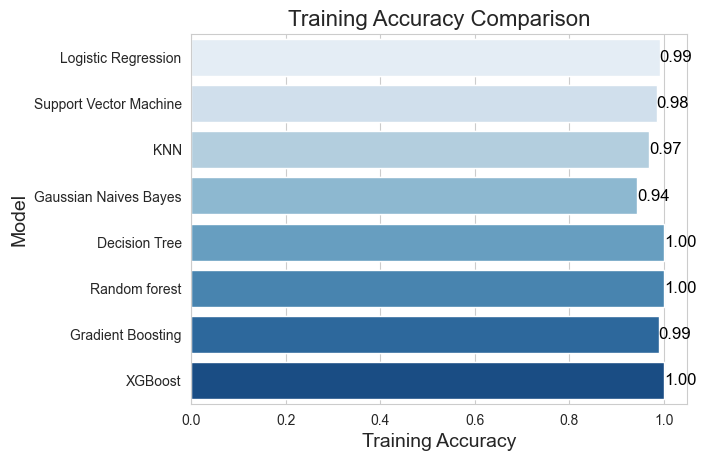

In [40]:
ax=sns.barplot(data=model_comparison,y='Model',x='Training Accuracy')
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Training Accuracy', palette="Blues")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Training Accuracy']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Training Accuracy Comparison', fontsize=16)
plt.xlabel('Training Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_2704/825708878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Testing Accuracy', palette="Blues_r")


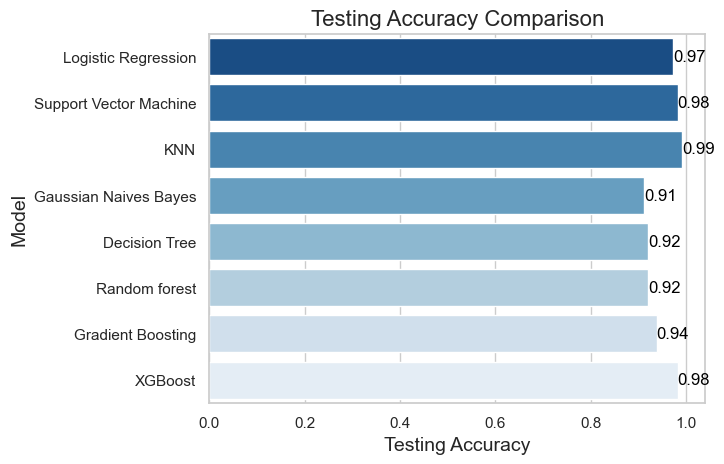

In [41]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Testing Accuracy', palette="Blues_r")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Testing Accuracy']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Testing Accuracy Comparison', fontsize=16)
plt.xlabel('Testing Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_2704/72442067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='F1 Score', palette="Greens_r")


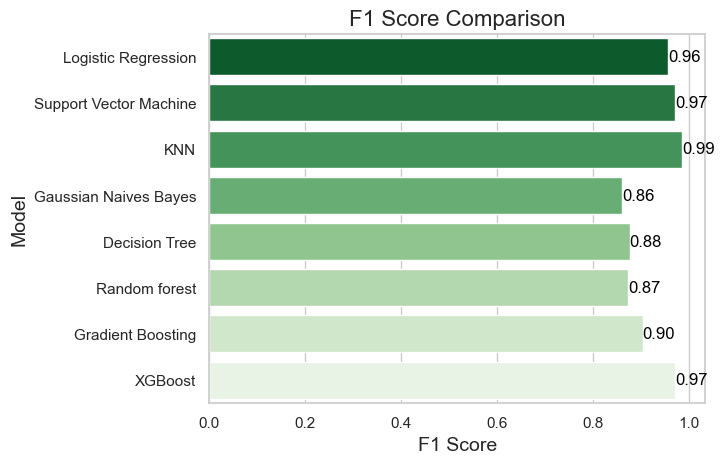

In [42]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='F1 Score', palette="Greens_r")

# Annotate the bars with values
for index, value in enumerate(model_comparison['F1 Score']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('F1 Score Comparison', fontsize=16)
plt.xlabel('F1 Score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_2704/3290121775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Precision', palette="Blues")


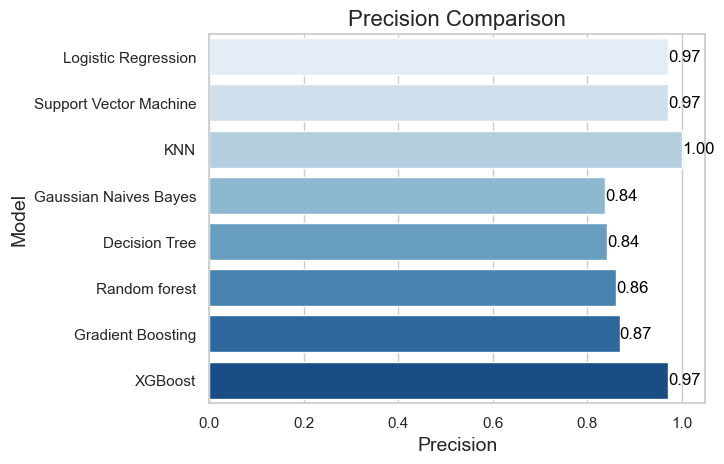

In [43]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Precision', palette="Blues")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Precision']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Precision Comparison', fontsize=16)
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_2704/3397842002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Recall', palette="Greens")


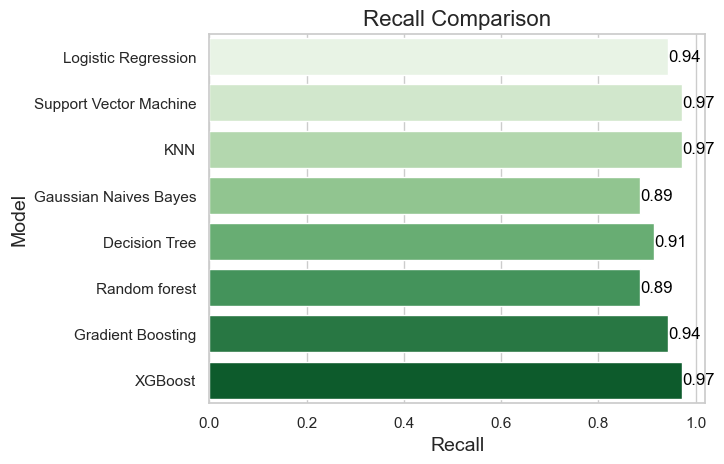

In [44]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Recall', palette="Greens")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Recall']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Recall Comparison', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

Error analysis- cross validation

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))


# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('\n➔ 10-Fold cross-validation accurcay score for the training data for six classifiers')

LR: 0.978068 (0.019554)
SVM: 0.973720 (0.016348)
KNN: 0.962754 (0.019558)
NB: 0.938551 (0.042470)
CART: 0.936522 (0.035389)
RF: 0.964928 (0.022287)
GB: 0.953913 (0.028419)
XGB: 0.962802 (0.025919)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers


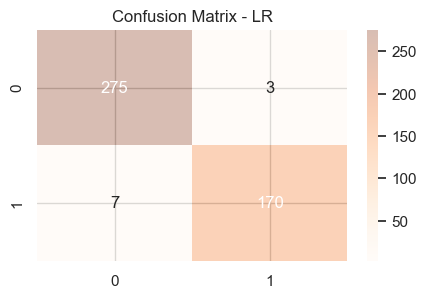

Classification Report - LR:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       278
           1       0.98      0.96      0.97       177

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455


LR: 0.98 (455)


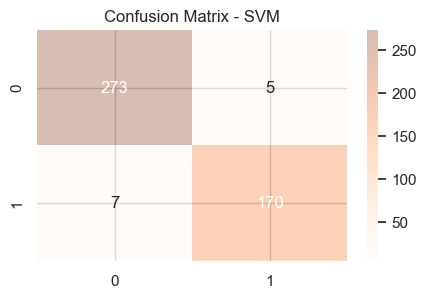

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       278
           1       0.97      0.96      0.97       177

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455


SVM: 0.97 (455)


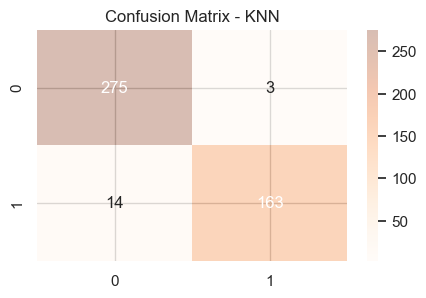

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       278
           1       0.98      0.92      0.95       177

    accuracy                           0.96       455
   macro avg       0.97      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


KNN: 0.96 (455)


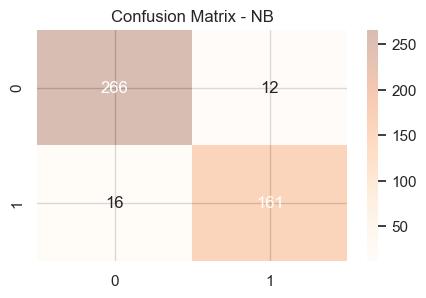

Classification Report - NB:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       278
           1       0.93      0.91      0.92       177

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455


NB: 0.94 (455)


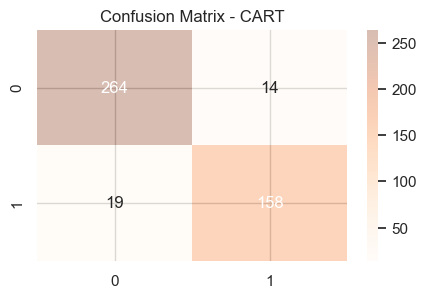

Classification Report - CART:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       278
           1       0.92      0.89      0.91       177

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455


CART: 0.93 (455)


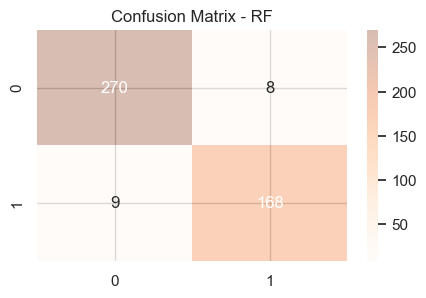

Classification Report - RF:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       278
           1       0.95      0.95      0.95       177

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


RF: 0.96 (455)


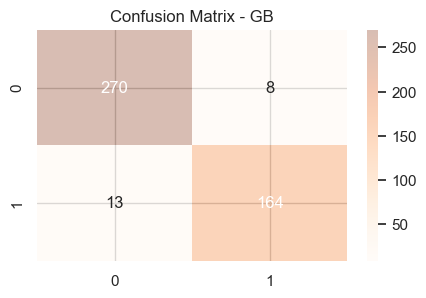

Classification Report - GB:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.95      0.93      0.94       177

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455


GB: 0.95 (455)


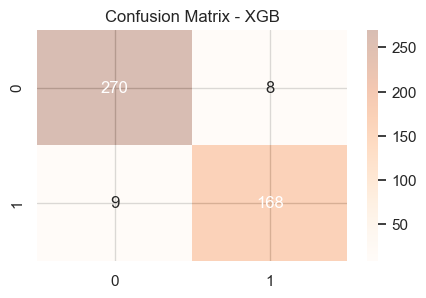

Classification Report - XGB:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       278
           1       0.95      0.95      0.95       177

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


XGB: 0.96 (455)

➔ 10-Fold cross-validation accuracy score for the training data for six classifiers

Feature importance not available for this model.


<Figure size 1000x600 with 0 Axes>

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Spot-Check Algorithms
models = [
    ('LR', LogisticRegression()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('XGB', XGBClassifier())
]

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Cross-validation predictions
    y_pred = cross_val_predict(model, X_train, y_train, cv=kfold)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_train, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', alpha=0.3)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Classification Report
    class_report = classification_report(y_train, y_pred)
    print(f'Classification Report - {name}:\n{class_report}\n')

    # Store results for later comparison
    results.append(class_report)
    names.append(name)

    msg = f"{name}: {class_report.split()[-2]} ({class_report.split()[-1]})"
    print(msg)

print('\n➔ 10-Fold cross-validation accuracy score for the training data for six classifiers')

# Visualize Feature Importance for one of the models (e.g., Logistic Regression)
# Assuming LR is the first model in the list
lr_model = models[0][1]
lr_model.fit(X_train, y_train)

# Feature Importance Visualization
try:
    feature_importance = lr_model.coef_[0]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=X_train.columns)
    plt.title('Feature Importance - Logistic Regression')
    plt.show()
except AttributeError:
    print("\nFeature importance not available for this model.")


In [47]:
model = model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Extract false positives (FP), false negatives (FN), etc.
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Display error analysis metrics
print("\nError Analysis Metrics:")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")

# Feature importance (if applicable to your model type)
try:
    feature_importance = model.coef_[0]  # Replace with your actual feature importance extraction method
    print("\nFeature Importance:")
    for feature, importance in zip(X.columns, feature_importance):
        print(f"{feature}: {importance}")
except AttributeError:
    print("\nFeature importance not available for this model.")

Confusion Matrix:
[[78  1]
 [ 1 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.97      0.97      0.97        35

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Error Analysis Metrics:
False Positives (FP): 1
False Negatives (FN): 1
True Positives (TP): 34
True Negatives (TN): 78

Feature importance not available for this model.


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have your X_train, y_train ready
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a StandardScaler and Logistic Regression
pipe_lr = Pipeline([
    ('scl', StandardScaler()),
    ('model', LogisticRegression())
])

# Define the parameter grid to search
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipe_lr, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Display LR results
lr_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring='accuracy')
print('LR Model Training Accuracy: %.3f +/- %.3f' % (np.mean(lr_scores), np.std(lr_scores)))

# Display LR results in a similar format to XGB
print('\nLR Best Hyperparameters: %s' % grid_search.best_params_)
print('Validation F1 Score: %.3f' % grid_search.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver 

LR Model Training Accuracy: 0.974 +/- 0.024

LR Best Hyperparameters: {'model__C': 0.1, 'model__penalty': 'l2'}
Validation F1 Score: 0.974


/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.63951691        nan 0.8989372         nan 0.94502415
        nan 0.97357488        nan 0.97357488        nan 0.97140097
        nan 0.96700483        nan 0.95386473]
  warnings.warn(


In [49]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Make XGBoost Classifier Pipeline
pipe_xgb = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf', XGBClassifier())
])

# Fit Pipeline to training Data
pipe_xgb.fit(X_train, y_train)

# Print Model Training Accuracy
scores = cross_val_score(estimator=pipe_xgb, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('Model Training Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Tune Hyperparameters
param_grid = {
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__min_child_weight': [1, 3, 5],
    'clf__subsample': [0.8, 0.9, 1.0],
    'clf__colsample_bytree': [0.8, 0.9, 1.0],
}

gs_xgb = GridSearchCV(estimator=pipe_xgb, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)
gs_xgb = gs_xgb.fit(X_train, y_train)

print('Tuned Parameters Best Score: ', gs_xgb.best_score_)
print('Best Parameters: \n', gs_xgb.best_params_)


Model Training Accuracy: 0.921 +/- 0.041
Tuned Parameters Best Score:  0.9428502415458937
Best Parameters: 
 {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__min_child_weight': 3, 'clf__n_estimators': 50, 'clf__subsample': 1.0}


In [50]:
# Assuming you have the grid_search object containing the tuned LR model
lr_model = grid_search.best_estimator_['model']  # Assuming 'model' is the name of the Logistic Regression model in your pipeline
lr_coefs = lr_model.coef_[0]

# Assuming you have a DataFrame 'X' containing your features
List_col = X.columns.tolist()

# Display feature importance
feature_importance = dict(zip(List_col, lr_coefs))
sorted_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


Feature Importance:
texture_worst: 0.6002956656264793
radius_worst: 0.4879922565192119
symmetry_worst: 0.4779369854595548
concave points_worst: 0.4671608531102614
concave points_mean: 0.4667774611988884
radius_se: 0.46411370752462655
area_worst: 0.4347143452257575
perimeter_worst: 0.43284384283465505
texture_mean: 0.4178782158061986
concavity_worst: 0.4097884646826463
smoothness_worst: 0.37815152264610635
radius_mean: 0.36901108398853416
perimeter_mean: 0.35714549852152105
concavity_mean: 0.35556985566985605
area_mean: 0.3542557824948626
area_se: 0.3449106674567667
perimeter_se: 0.3264177248154722
fractal_dimension_se: -0.2653722158723001
compactness_se: -0.26086567624637247
fractal_dimension_mean: -0.19043525875811723
symmetry_se: -0.17616190439036655
compactness_worst: 0.15141953033020047
smoothness_mean: 0.13853112451146618
concave points_se: 0.11377433780353473
fractal_dimension_worst: 0.10809116081973175
id: 0.07054560910604366
concavity_se: -0.06239115110987657
smoothness_se: 0.0

Prediction

In [52]:
# Assuming you have the grid_search object containing the tuned LR model
def predict_cancer_lr(input_data):
    df = scaler.transform(np.array([input_data]))
    prediction = grid_search.best_estimator_.predict(df)
    return 'The tumor is Malignant (cancerous)' if prediction == 1 else 'The tumor is Benign (non-cancerous)'

List_col = [col for col in X.columns]
print(List_col)
print('----------------------------------------------------------------------------------------------------------------------')
print('\t\t\t\t  BREAST CANCER PREDICTION SYSTEM ')
print('----------------------------------------------------------------------------------------------------------------------')

# Ensure that the patient_data includes all 30 features
patient_data = [85922302,12.68,23.84,82.69,499.0,0.1122,0.1262,0.1128,0.06873,0.1905,0.0659,0.4255,1.178,2.927,36.46,0.007781,0.02648,0.02973,0.0129,0.01635,0.003601,17.09,33.47,111.8,888.3,0.1851,0.4061,0.4024,0.1716,0.3383,0.1031]

# Pass all features to predict_cancer_lr
result = predict_cancer_lr(patient_data)
print('PREDICTION :', end=' ')
print(result)
print('----------------------------------------------------------------------------------------------------------------------')


['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
----------------------------------------------------------------------------------------------------------------------
				  BREAST CANCER PREDICTION SYSTEM 
----------------------------------------------------------------------------------------------------------------------
PREDICTION : The tumor is Malignant (cancerous)
----------------------------------------------------------------------------------------------------------------------


/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
